# Evaluation


In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Settings
ndb_filepath = '/home/farah/Workspace/statefun-ndb-benchmark/output-consumer/output-data/28-03-2022_15:36/part-00000-870da99c-6a96-4466-b40c-94886c7b9651-c000.json'
rocksdb_filepath = '/home/farah/Workspace/statefun-ndb-benchmark/output-consumer/output-data/28-03-2022_15:43/part-00000-cb8a0010-069c-4ba9-bd5a-66421d8bf209-c000.json'

In [8]:
# Preprocessing
ndb_df = pd.read_json(ndb_filepath, lines=True)

initial_timestamp = ndb_df["inputKafkaTimestamp"].min()
ndb_df["latency"] = ndb_df["outputKafkaTimestamp"] - ndb_df["inputKafkaTimestamp"]
# Start time of event in seconds, counted from initial event, convert to int to create 1 second buckets
ndb_df["startTimeBucket"] = ((ndb_df["inputKafkaTimestamp"] - initial_timestamp)/1000).astype(int)
ndb_df["endTimeBucket"] = ((ndb_df["outputKafkaTimestamp"] - initial_timestamp)/1000).astype(int)


rocksdb_df = pd.read_json(rocksdb_filepath, lines=True)

initial_timestamp = rocksdb_df["inputKafkaTimestamp"].min()
rocksdb_df["latency"] = rocksdb_df["outputKafkaTimestamp"] - rocksdb_df["inputKafkaTimestamp"]
# Start time of event in seconds, counted from initial event, convert to int to create 1 second buckets
rocksdb_df["startTimeBucket"] = ((rocksdb_df["inputKafkaTimestamp"] - initial_timestamp)/1000).astype(int)
rocksdb_df["endTimeBucket"] = ((rocksdb_df["outputKafkaTimestamp"] - initial_timestamp)/1000).astype(int)


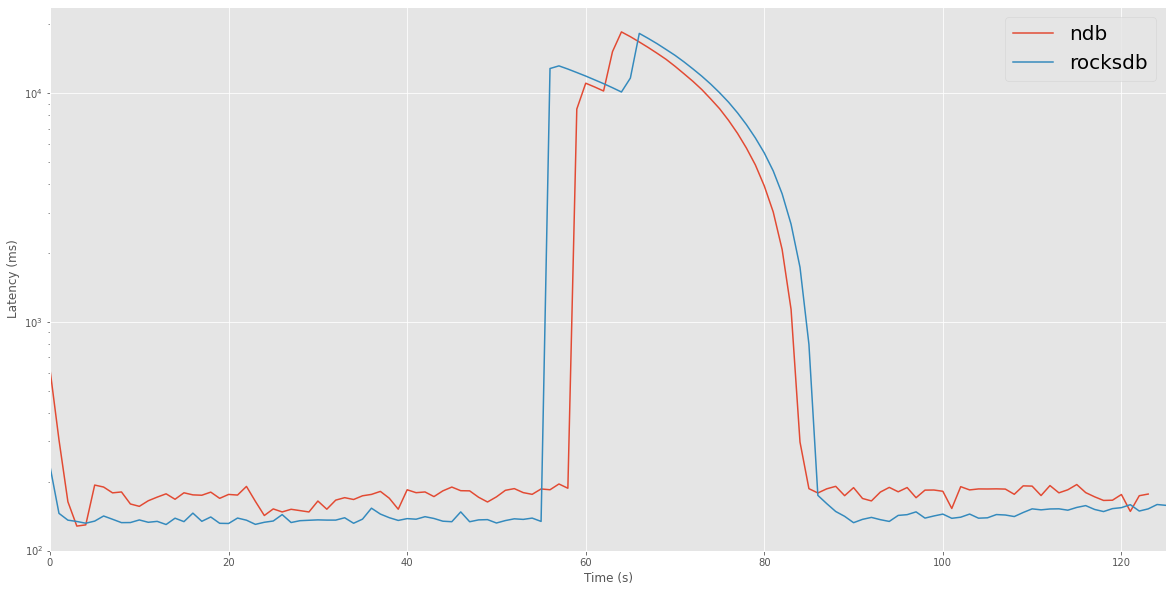

In [17]:
# Latency plot
plt.style.use('ggplot')

plt.figure(figsize=(20, 10))
plt.yscale("log")
plt.ylabel("Latency (ms)")
plt.xlabel("Time (s)")

p = ndb_df.groupby("startTimeBucket")["latency"].mean()
plt.plot(p, label="ndb")

p = rocksdb_df.groupby("startTimeBucket")["latency"].mean()
plt.plot(p, label="rocksdb")

plt.legend(prop={'size': 20})

# Set x limits from 0 to max to have plot span to the edges of the figure
ndb_max = ndb_df["startTimeBucket"].max()
rocksdb_max = rocksdb_df["startTimeBucket"].max()
x_max = max(ndb_max, rocksdb_max)
plt.xlim(0, x_max)

plt.savefig("/home/farah/Workspace/statefun-ndb-benchmark/evaluator/figures/latency")

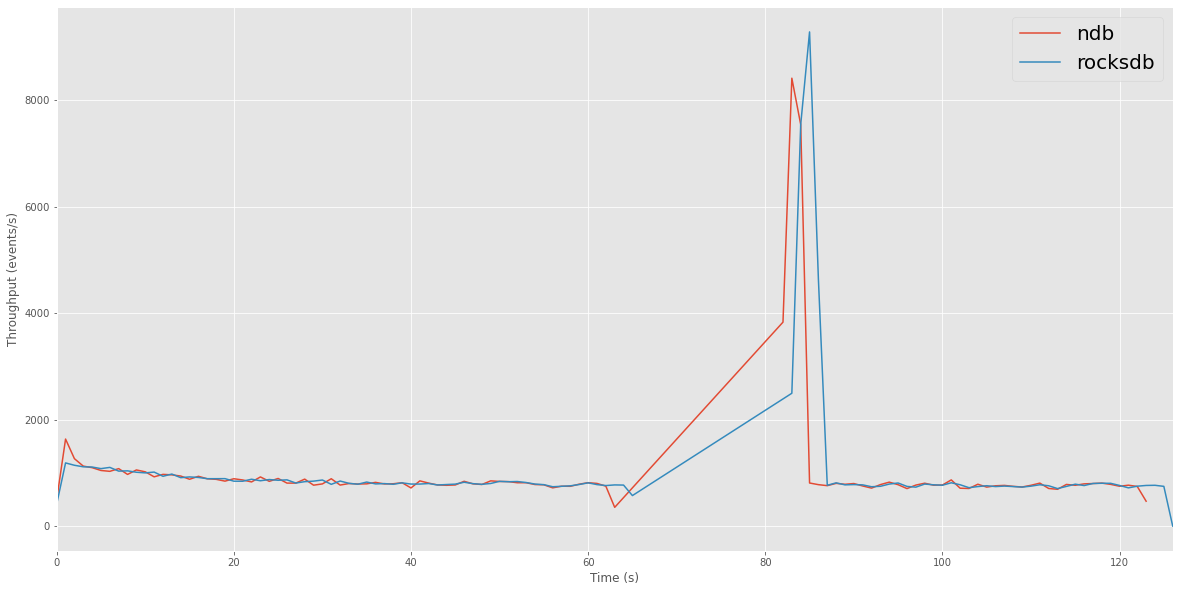

In [20]:
# Throughput plot

plt.figure(figsize=(20, 10))
plt.ylabel("Throughput (events/s)")
plt.xlabel("Time (s)")

p = ndb_df.groupby("endTimeBucket")["latency"].count()
plt.plot(p, label="ndb")

p = rocksdb_df.groupby("endTimeBucket")["latency"].count()
plt.plot(p, label="rocksdb")
plt.legend(prop={'size': 20})

# Set x limits from 0 to max to have plot span to the edges of the figure
ndb_max = ndb_df["endTimeBucket"].max()
rocksdb_max = rocksdb_df["endTimeBucket"].max()
x_max = max(ndb_max, rocksdb_max)
plt.xlim(0, x_max)

plt.savefig("/home/farah/Workspace/statefun-ndb-benchmark/evaluator/figures/throughput.png")